In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df= pd.read_csv('Canada.csv')
df.head(5)
# plt.rcParams["font.family"]="Arial"


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [52]:
df.set_index('Country',inplace=True)
years = list(map(str, range(1980,2014))) 

df.sort_values(by= 'Total', ascending=False, axis=0, inplace=True)
df_top5 = df.head()
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [53]:
# transpose the dataframe
df_top5 = df_top5[years].transpose()
df_top5.head()


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


# Area Plot


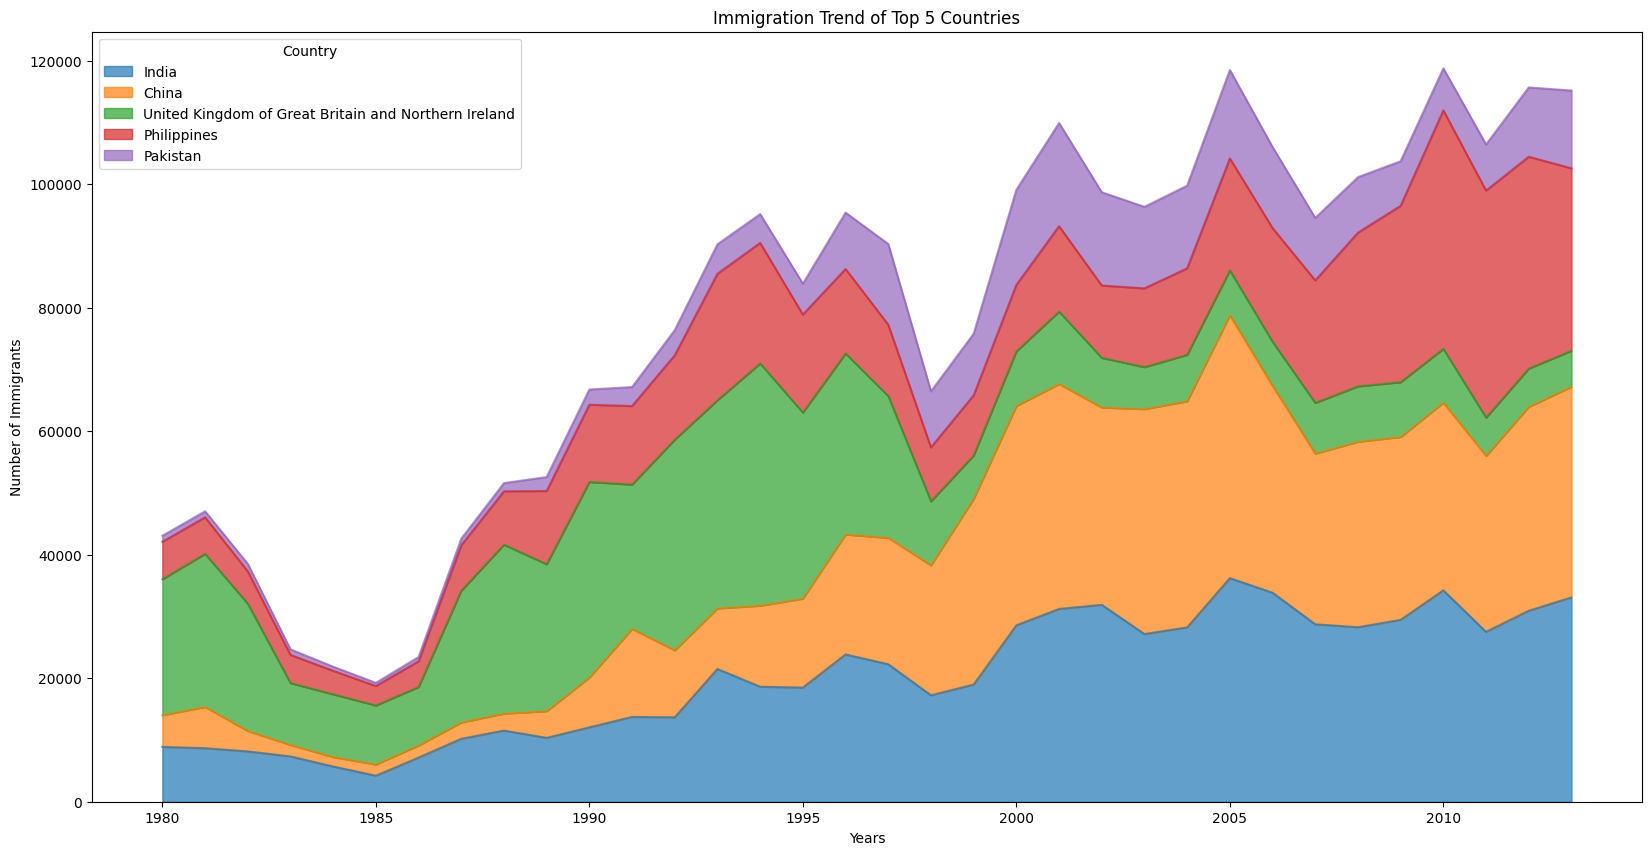

In [8]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             alpha=0.7,         #default transparency (alpha value) at 0.5
             stacked=True,
             figsize=(20, 10))  

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Histograms


In [9]:
df['2013'].head()


Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [10]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


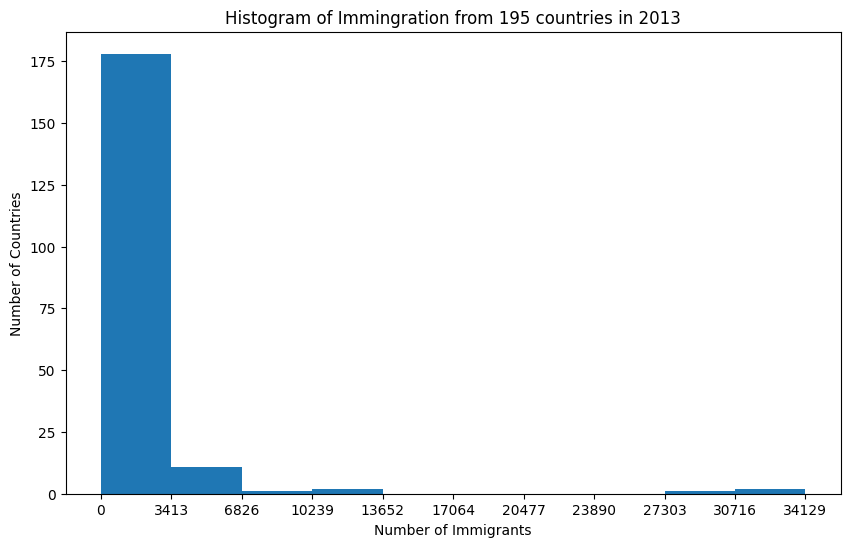

In [11]:
df['2013'].plot(kind='hist',figsize=(10,6),xticks=bin_edges)
plt.title('Histogram of Immingration from 195 countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.show()

### What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [12]:
df.loc[['Denmark','Norway','Sweden'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [13]:
df_t = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


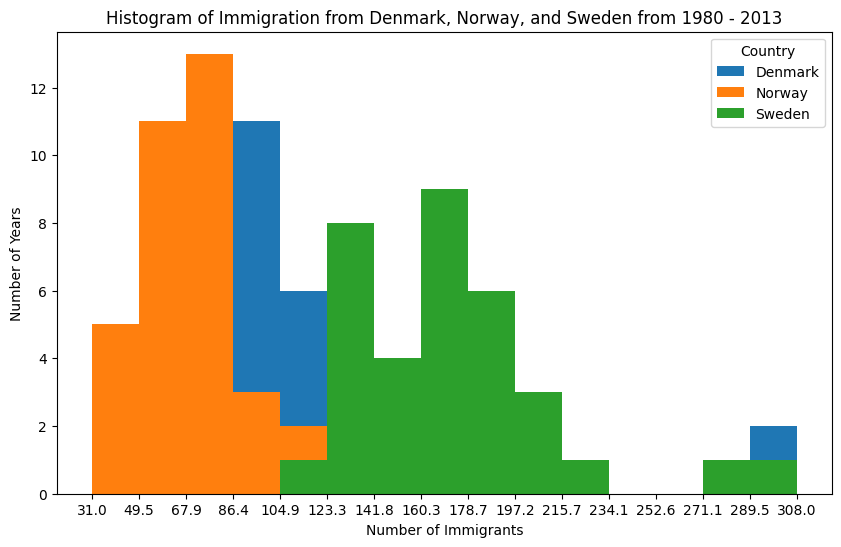

In [14]:
count , bin_edges = np.histogram(df_t,15)
df_t.plot(kind='hist',
          figsize=(10,6),
          bins=15,
          xticks=bin_edges)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

# Bar Chart
### Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [41]:
df_iceland = df.loc['Iceland',years]
df_iceland.head(10)


1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
Name: Iceland, dtype: int64

Text(0.5, 1.0, 'Icelandic immigrants to Canada from 1980 to 2013')

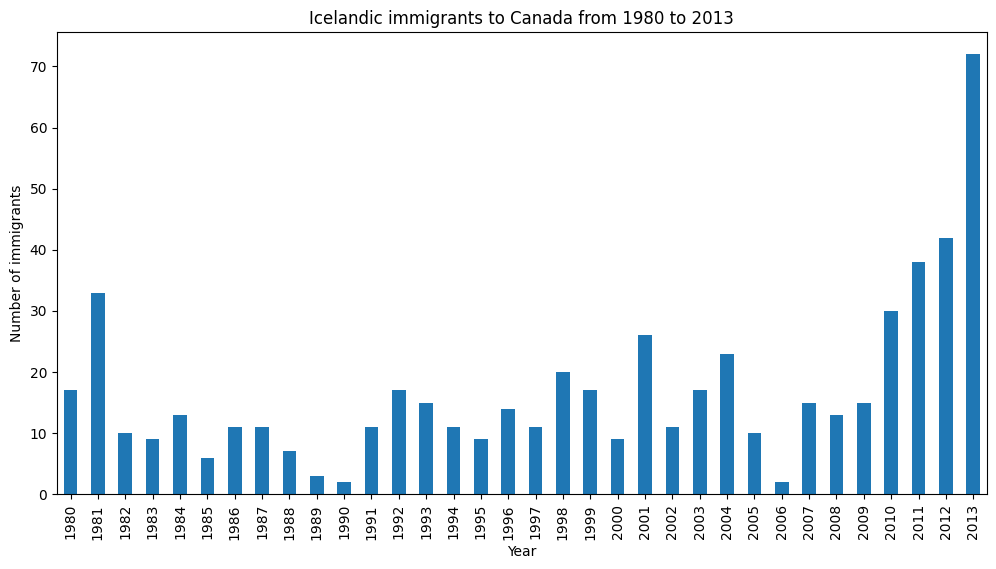

In [16]:
df_iceland.plot(kind='bar',figsize = (12,6))
plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 

# Pie Chart

In [17]:
df_continents = df.groupby('Continent',axis=0).sum() #output of groupby method is a `groupby' object, we can not use it further until we apply a function
df_continents.head()


/var/folders/p1/t96f4tgd04ldzft7345vdthw0000gn/T/ipykernel_5664/950860035.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df.groupby('Continent',axis=0).sum() #output of groupby method is a `groupby' object, we can not use it further until we apply a function


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaNorthern AfricaNorthern AfricaE...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaEastern AsiaSouth-Eastern AsiaSou...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Northern EuropeEastern EuropeWestern EuropeEas...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanCaribbeanSouth AmericaSouth AmericaCe...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


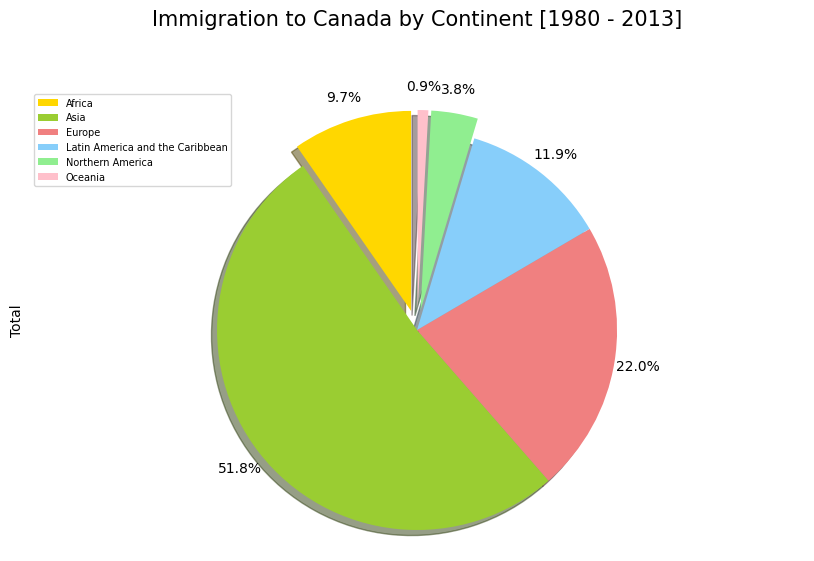

In [18]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 
plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 


# Box Plot
A box plot is a way of statistically representing the distribution of the data through five main dimensions:
1. Minimum: The smallest number in the dataset excluding the outliers.
2. First quartile: Middle number between the minimum and the median.
3. Second quartile (Median): Middle number of the (sorted) dataset.
4. Third quartile: Middle number between median and maximum.
5. Maximum: The largest number in the dataset excluding the outliers.

In [19]:
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()


Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Text(0, 0.5, 'Number of Immigrants')

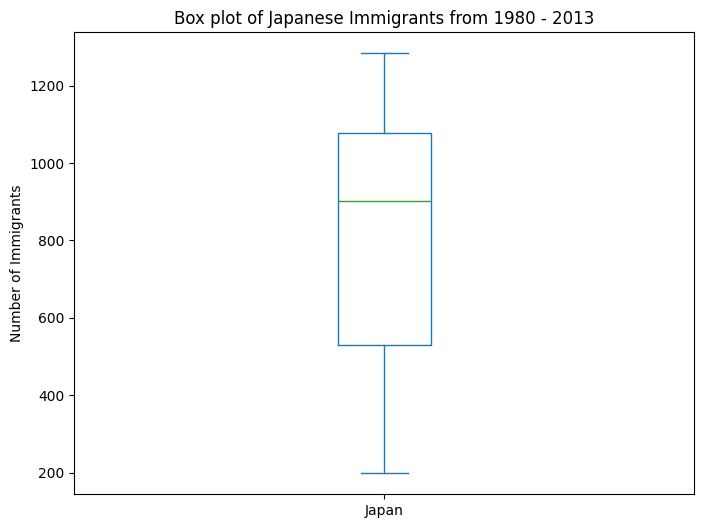

In [20]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

In [21]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [22]:
df_CI= df.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [23]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Text(0, 0.5, 'Number of Immigranst')

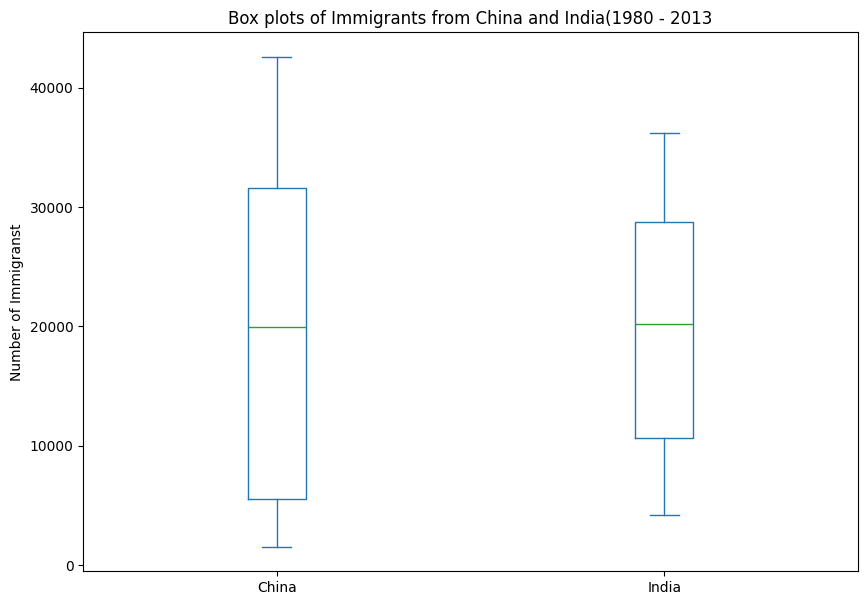

In [24]:
df_CI.plot(kind = 'box' ,figsize=(10,7))
plt.title('Box plots of Immigrants from China and India(1980 - 2013')
plt.ylabel('Number of Immigranst')

# Sub Plots

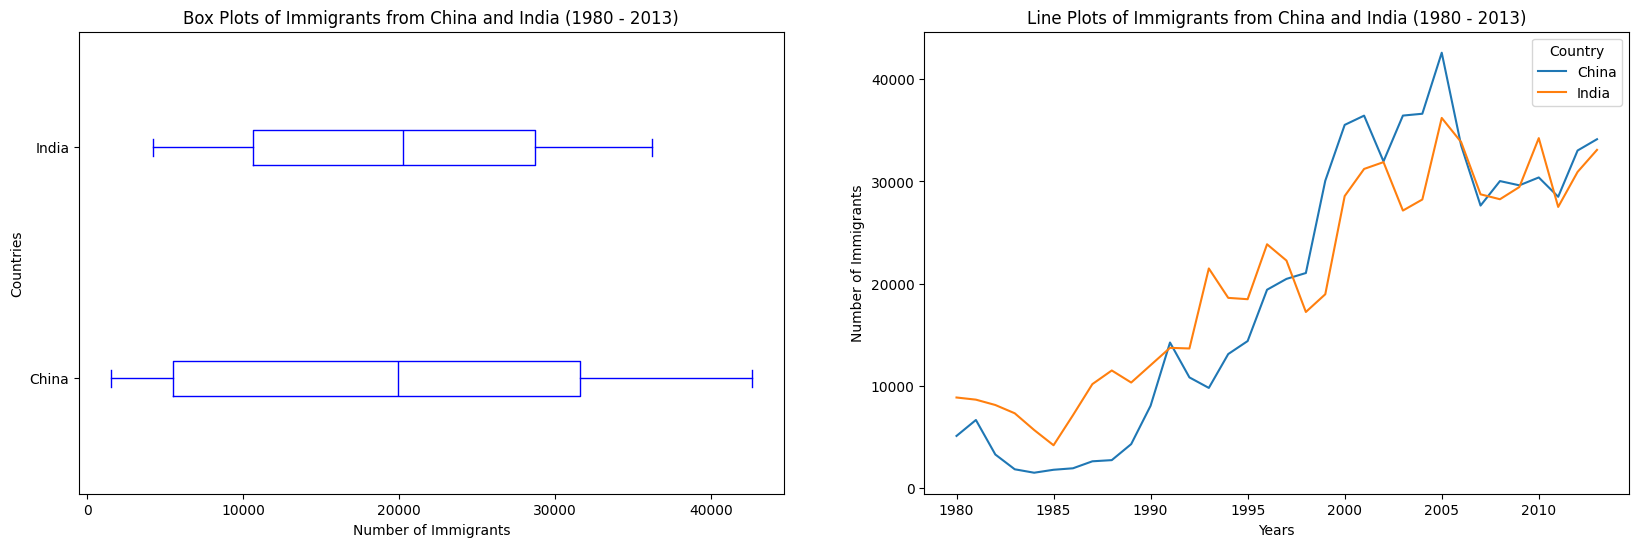

In [25]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

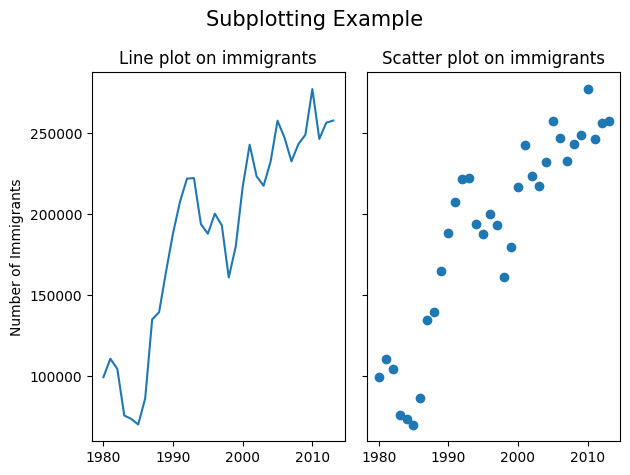

In [26]:
df_line=df[years]
total_immigrants=df_line.sum()

# Both the subplots will be sharing the same y-axis as the data in the y-axis is the same. So, assign the ‘Sharey’ parameter as True in the code below.
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)
total_immigrants.index = total_immigrants.index.map(int)

axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


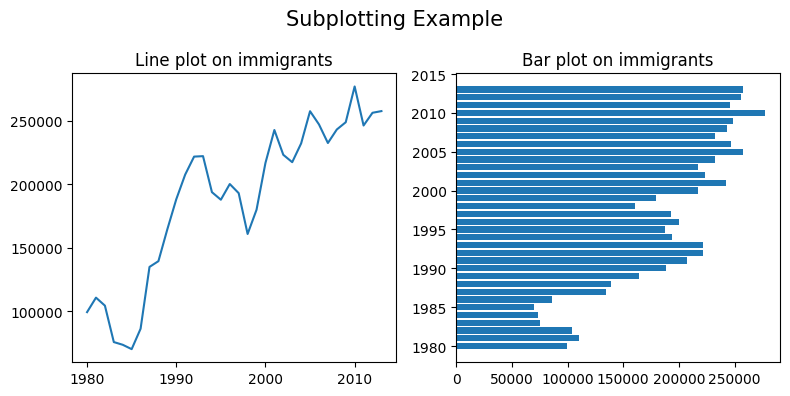

In [27]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()


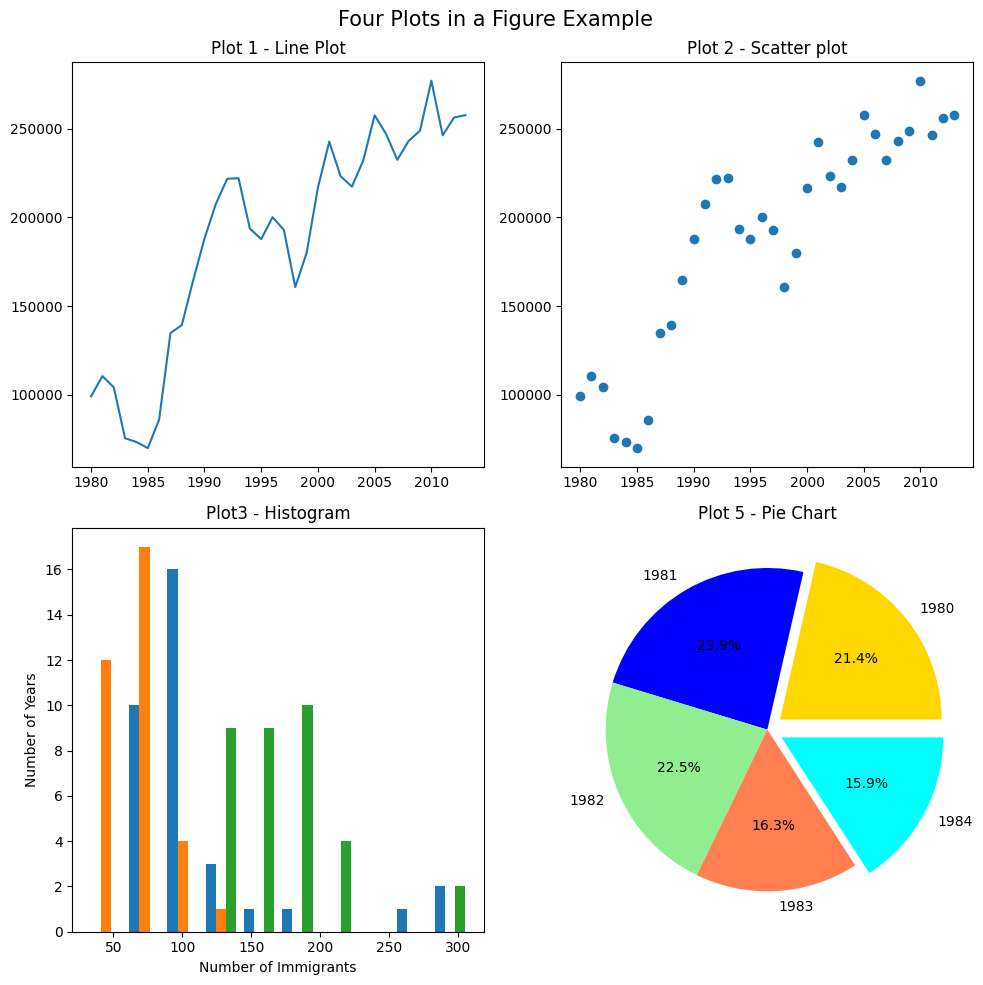

In [39]:
df=df.groupby(['Country'])[years].sum()
df_dns=df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns=df_dns.T

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrants)
ax1.set_title('Plot 1 - Line Plot')

ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrants.index, total_immigrants)
ax2.set_title('Plot 2 - Scatter plot')

ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_dns)
ax3.set_title('Plot3 - Histogram') 
ax3.set_xlabel('Number of Immigrants')
ax3.set_ylabel('Number of Years')

ax4 = fig.add_subplot(2, 2, 4)
explode_list = [0.1, 0, 0, 0, 0.1]
ax4.pie(total_immigrants[0:5], labels=years[0:5], 
           colors = ['gold','blue','lightgreen','coral','cyan'],
           explode=explode_list,
           autopct='%1.1f%%')
ax4.set_aspect('equal')  
ax4.set_title('Plot 5 - Pie Chart')

fig.suptitle('Four Plots in a Figure Example', fontsize=15)

fig.tight_layout()




## Scatter Plot
Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type

In [29]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


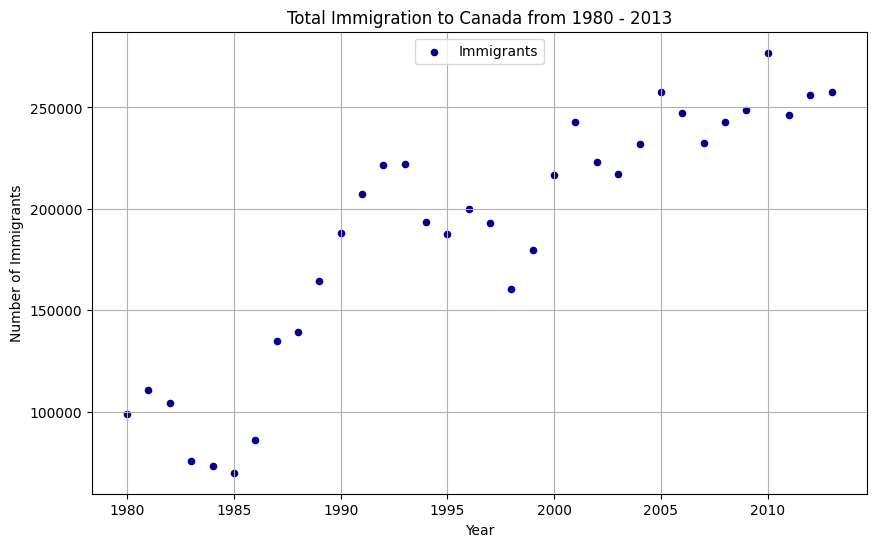

In [30]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid(True)
plt.legend(["Immigrants"], loc='upper center')

plt.show()


In [31]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

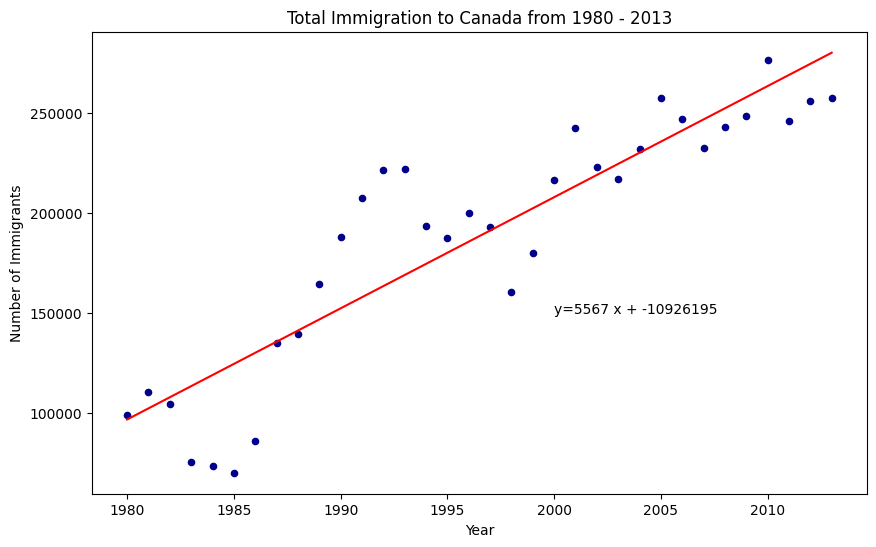

'No. Immigrants = 5567 * Year + -10926195'

In [37]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 


In [55]:

df_dsn = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


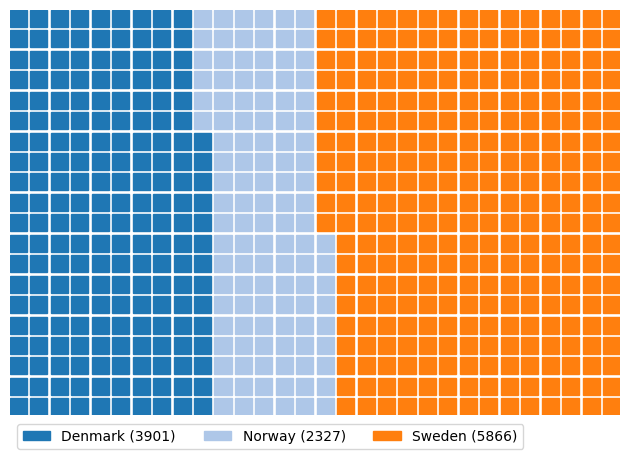

In [56]:
from pywaffle import Waffle
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )


In [6]:
import seaborn as sns
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

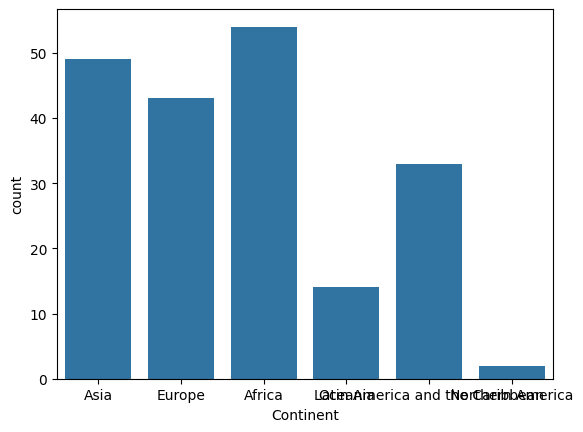

In [7]:
sns.countplot(x='Continent', data=df)

In [ ]:
df_can1 = df.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

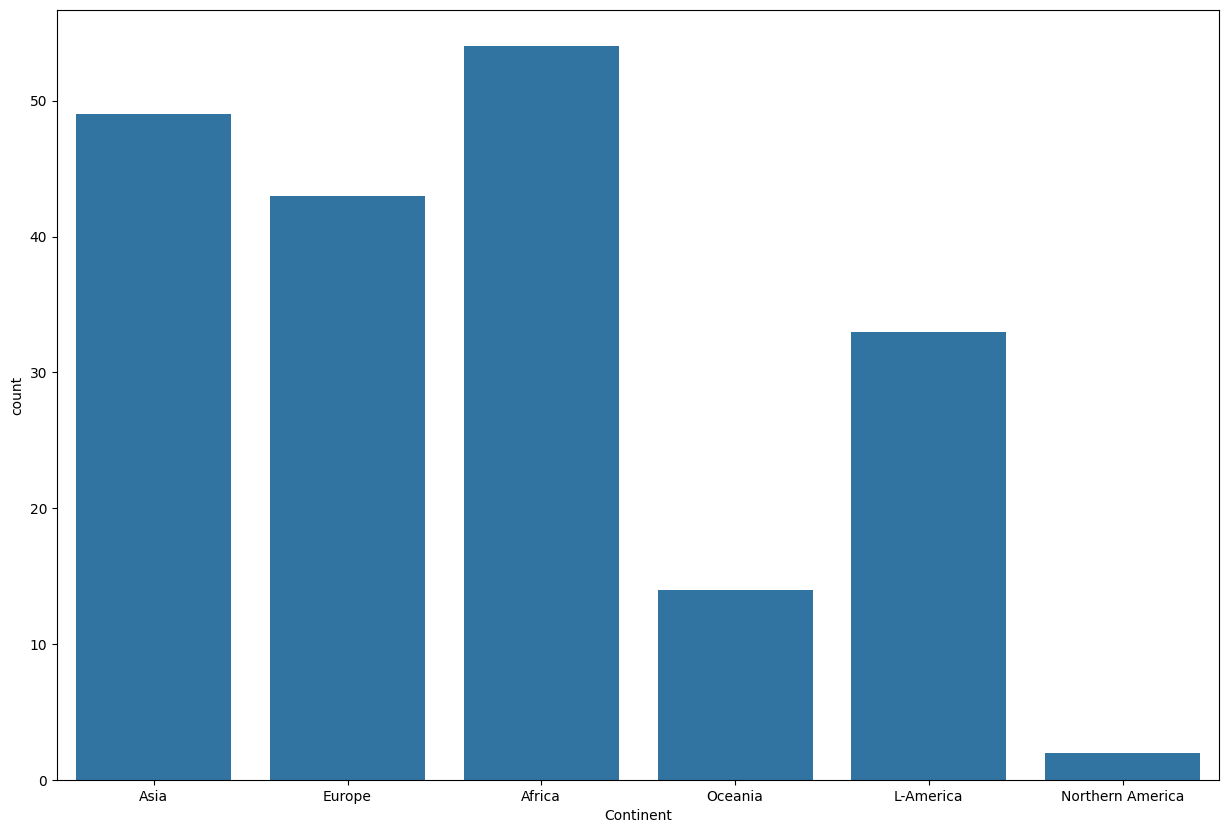

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

<Axes: xlabel='Continent', ylabel='Total'>

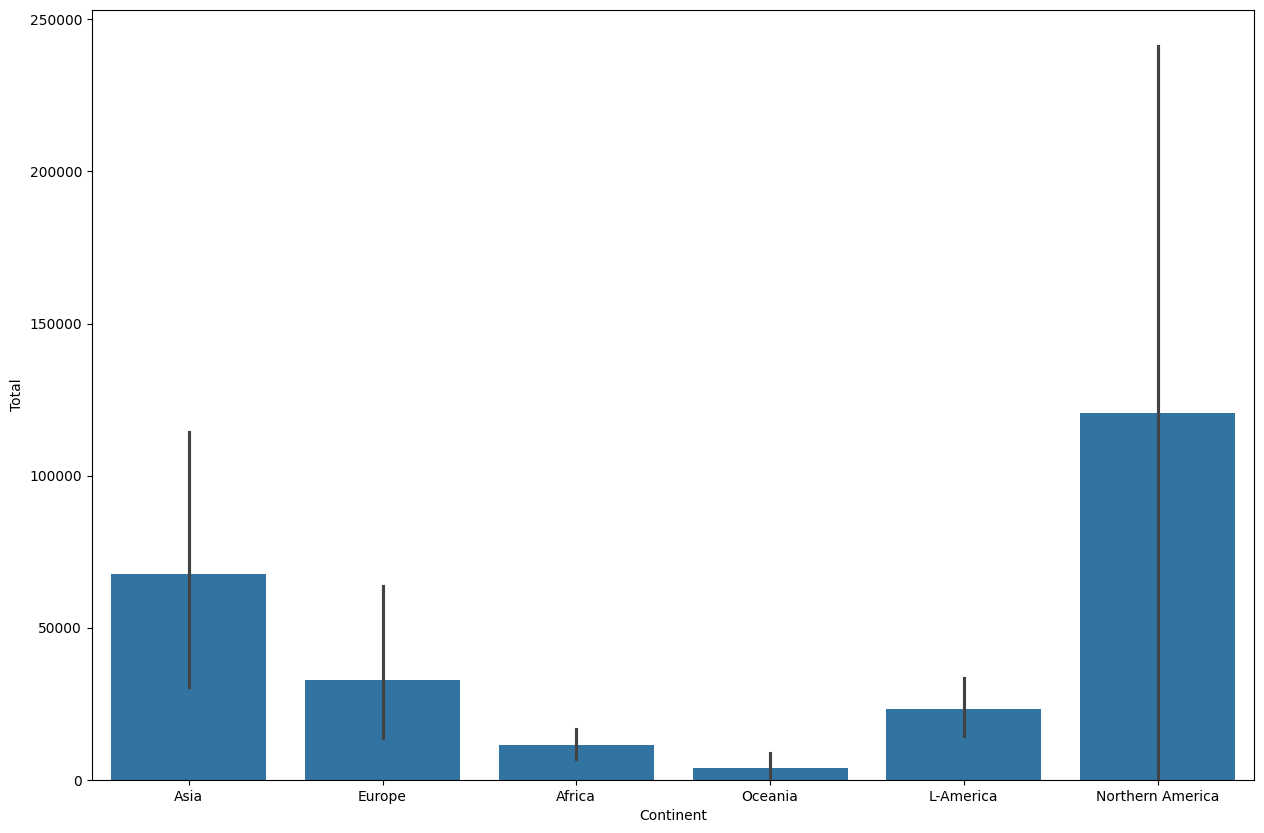

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)